<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Решающее-дерево&quot;" data-toc-modified-id="Модель-&quot;Решающее-дерево&quot;-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель "Решающее дерево"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Решающее-дерево&quot;" data-toc-modified-id="Модель-&quot;Решающее-дерево&quot;-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Модель "Решающее дерево"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li></ul></li><li><span><a href="#ROC-кривые" data-toc-modified-id="ROC-кривые-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>ROC-кривые</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**<br>

- Признаки:<br>
RowNumber — индекс строки в данных <br>
CustomerId — уникальный идентификатор клиента<br>
Surname — фамилия<br>
CreditScore — кредитный рейтинг<br>
Geography — страна проживания<br>
Gender — пол<br>
Age — возраст<br>
Tenure — сколько лет человек является клиентом банка<br>
Balance — баланс на счёте<br>
NumOfProducts — количество продуктов банка, используемых клиентом<br>
HasCrCard — наличие кредитной карты<br>
IsActiveMember — активность клиента<br>
EstimatedSalary — предполагаемая зарплата<br>
- Целевой признак:<br>
Exited — факт ухода клиента<br>

**План выполнения проекта**

Загрузим и подготовим данные.<br> 
Исследуем баланс классов, обучим модель. <br>
Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. <br>
Проведем финальное тестирование.<br>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

from sklearn.metrics import make_scorer


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

Изучим данные таблицы.

In [2]:
churn = pd.read_csv('/datasets/Churn.csv')

Поменяем регистр столбцов для удобства работы

In [3]:
churn = churn.rename(str.lower, axis='columns')
churn.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             9091 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Рассмотрим первые пять строк

In [5]:
churn.head(5)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Уникальные столбцы rownumber, customerid и surname для построения модели не нужны, их можно удалить. 

In [6]:
churn = churn.drop(['rownumber' , 'customerid', 'surname'], axis=1)

Рассмотрим пропуски

In [7]:
churn.isnull().sum()

creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

Пропуски в столбце Tenure — сколько лет человек является клиентом банка. 
Так как информации нет, то приравняем этих людей к тем, кто пользуется банком меньше года, то есть заполним нулями.

In [8]:
churn.isnull().sum()
churn['tenure']=churn['tenure'].fillna(0).astype('int')

Все остальные данные в норме. 

## Исследование задачи

Для начала рассмотрим корелляцию признаков, нет ли зависимых друг от друга. 

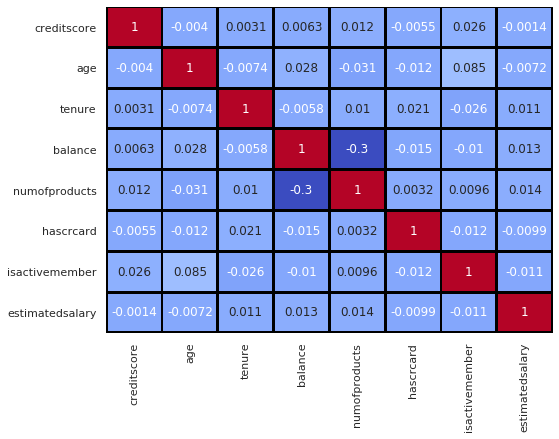

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(churn.drop(['exited'], axis=1).corr(), annot = True, cmap='coolwarm',
            linecolor='black', linewidths=2, cbar=False)

Зависимых признаков нет. 

Рассмотрим распределение целевого признака в процентах

0    0.7963
1    0.2037
Name: exited, dtype: float64


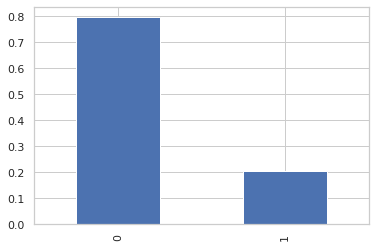

In [10]:
class_frequency = churn['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

Целевой признак распределен как 80/20 процентов в пользу 0 (клиент не ушел). 
Наблюдается сильный дисбаланс классов, который помешает обучению модели. 

В таблице имеются категориальные признаки geography и gender.
Преобразуем категориальные признаки в численные с помощью One-Hot Encoding. 

In [11]:
churn_ohe = pd.get_dummies(churn, drop_first=True)

Создадим переменные для признаков и целевого признака.

In [12]:
features_ohe = churn_ohe.drop(['exited'], axis=1)
target_ohe = churn_ohe['exited']

Разобьем датасет на обучающую, валидационную и тестовую выборку в соотношении 60-20-20

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ohe, target_ohe, test_size=0.4, random_state=12345, stratify=target_ohe)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)


print('Размер обучающей выборки:', len(features_train))
print('Размер валидационной выборки:', len(features_valid))
print('Размер тестовой выборки:', len(features_test))


Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


Численные признаки приведем к одному масштабу 

In [14]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features_train.head(5)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
2837,-1.040434,0.953312,0.467449,0.774657,1,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-1.461501,1.910540,1,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.110432,0.481608,2,0,1,1.422836,0,0,1
660,-0.184996,0.190726,-1.461501,0.088439,1,1,1,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.140009,0.879129,1,1,0,0.113236,0,0,0


## Борьба с дисбалансом

Исследуем баланс классов и обучим модель. 

Создадим три разных модели и посмотрим на F1-меру и AUC-ROC.

Для балансировки классов для всех моделей используем аргумент class_weight.

### Модель "Решающее дерево" ###

Выберем лучший вариант глубины дерева с помощью сетки GridSearchCV

Создадим табличку для записи метрик:

In [15]:
d = {'Метрика': ['F-мера', 'AUC_ROC', 'param']}
total_table = pd.DataFrame(data=d)

In [16]:
model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')

parameters = {'max_depth': range(1,16,1)}

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_train, target_train)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
DecisionTree_fpr, DecisionTree_tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)


{'max_depth': 6}
F1-мера наилучшей модели на валидационной выборке: 0.575925925925926
AUC_ROC: 0.8234124051630702


In [17]:
#Запишем в табличку
col = 'DecisionTree'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items() ]


### Модель "Случайный лес" ###

Для модели "Случайный лес" подберем два гиперпараметра: <br>
n_estimators - число деревьев<br>
max_depth - максимальная глубина деревьев<br>


In [18]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')

parameters = {'n_estimators': range (1,100,20),
              'max_depth': range(1,12,2)    }

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_train, target_train)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
RandomForest_fpr, RandomForest_tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 9, 'n_estimators': 61}
F1-мера наилучшей модели на валидационной выборке: 0.6367816091954023
AUC_ROC: 0.869606919400926


In [19]:
col = 'RandomForest'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]

Сравним результат этой же модели без балансировки классов. 

In [20]:
model = RandomForestClassifier(random_state=12345)

parameters = {'n_estimators': range (1,100,20),
              'max_depth': range(1,12,2)    }

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_train, target_train)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 11, 'n_estimators': 41}
F1-мера наилучшей модели на валидационной выборке: 0.6009104704097117
AUC_ROC: 0.867139003842743


In [21]:
col = 'ForestNoBalance'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]
total_table

,Метрика,DecisionTree,RandomForest,ForestNoBalance
0,F-мера,0.575926,0.636782,0.60091
1,AUC_ROC,0.823412,0.869607,0.867139
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))"


С балансировкой результат лучше.

### Модель "Логистическая регрессия" ###

Будем менять параметр регуляризации 'C', чтобы избежать переобучения модели. 

In [22]:
model = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')

parameters = {'C' : np.logspace(-4, 4, 20)}

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_train, target_train)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
LogisticRegression_fpr, LogisticRegression_tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'C': 0.0018329807108324356}
F1-мера наилучшей модели на валидационной выборке: 0.5376146788990827
AUC_ROC: 0.7954893955069465


In [23]:
col = 'LogisticRegression'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items() ]
total_table

,Метрика,DecisionTree,RandomForest,ForestNoBalance,LogisticRegression
0,F-мера,0.575926,0.636782,0.60091,0.537615
1,AUC_ROC,0.823412,0.869607,0.867139,0.795489
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))","((C, 0.0018329807108324356))"


Наилучшие результаты (0.63) показала модель "Случайный лес" с параметрами depth = 9, est = 61. <br>
Неплохие (0.57) у модели "Решающее дерево" с глубиной 6.
Наихудшие у модели "Логистическая регрессия". 

### Взвешивание классов ###

Рассмотрим дисбаланс классов. 

In [24]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4778, 11)
(1222, 11)
(4778,)
(1222,)


Веса несбалансированные, попробуем увеличить выборку положительных объектов в четыре раза. <br>
Создадим функцию upsample.

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Второй вариант - уменьшим часть отрицательных ответов, возьмем только четверть. <br>
Создадим функцию downsample.

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


Рассмотрим диаграмму весов классов после выравнивания

1    0.50569
0    0.49431
Name: exited, dtype: float64


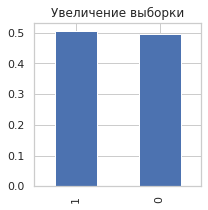

In [28]:
class_frequency = target_upsampled.value_counts(normalize = True)
print(class_frequency)
plt.figure(figsize=(3,3))
plt.title('Увеличение выборки')
class_frequency.plot(kind='bar') 

1    0.505795
0    0.494205
Name: exited, dtype: float64


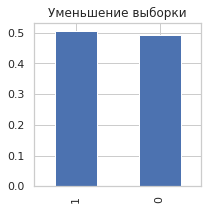

In [29]:
class_frequency = target_downsampled.value_counts(normalize = True)
print(class_frequency)
plt.figure(figsize=(3,3))
plt.title('Уменьшение выборки')
class_frequency.plot(kind='bar') 

Попробуем применить новые датасеты к моделям Случайный лес и Решающее дерево. 

#### Модель "Решающее дерево" ####

In [30]:
model = DecisionTreeClassifier(random_state=12345)

parameters = {'max_depth': range(1,16,1)}

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_upsampled, target_upsampled)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 15}
F1-мера наилучшей модели на валидационной выборке: 0.5116279069767441
AUC_ROC: 0.699654830525175


In [31]:
col = 'DecisionTreeUp'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]


In [32]:
model = DecisionTreeClassifier(random_state=12345)

parameters = {'max_depth': range(1,16,1)}

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_downsampled, target_downsampled)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 6}
F1-мера наилучшей модели на валидационной выборке: 0.5939278937381405
AUC_ROC: 0.8472324859592077


In [33]:
col = 'DecisionTreeDown'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]

#### Модель "Случайный лес" ####

In [34]:
model = RandomForestClassifier(random_state=12345)

parameters = {'n_estimators': range (1,100,20),
              'max_depth': range(1,12,2)    }

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_upsampled, target_upsampled)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
RandomForest_fpr, RandomForest_tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 11, 'n_estimators': 81}
F1-мера наилучшей модели на валидационной выборке: 0.6405529953917051
AUC_ROC: 0.8703428293427924


In [35]:
col = 'RandomForestUp'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]

In [36]:
model = RandomForestClassifier(random_state=12345)

parameters = {'n_estimators': range (1,100,20),
              'max_depth': range(1,12,2)    }

grid = GridSearchCV(model, parameters, scoring = 'f1', cv = 5)
grid.fit(features_downsampled, target_downsampled)

print(grid.best_params_)

predictions_valid = grid.predict(features_valid)
f1 = f1_score(target_valid, predictions_valid) 
probabilities_valid = grid.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("F1-мера наилучшей модели на валидационной выборке:", f1)
print("AUC_ROC:", auc_roc)

{'max_depth': 9, 'n_estimators': 61}
F1-мера наилучшей модели на валидационной выборке: 0.6180094786729857
AUC_ROC: 0.866618632377574


In [37]:
col = 'RandomForestDown'
total_table.loc[0, col] = f1
total_table.loc[1, col] = auc_roc 
total_table.loc[2, col] = [grid.best_params_.items()]
total_table

,Метрика,DecisionTree,RandomForest,ForestNoBalance,LogisticRegression,DecisionTreeUp,DecisionTreeDown,RandomForestUp,RandomForestDown
0,F-мера,0.575926,0.636782,0.60091,0.537615,0.511628,0.593928,0.640553,0.618009
1,AUC_ROC,0.823412,0.869607,0.867139,0.795489,0.699655,0.847232,0.870343,0.866619
2,param,"((max_depth, 6))","((max_depth, 9), (n_estimators, 61))","((max_depth, 11), (n_estimators, 41))","((C, 0.0018329807108324356))","((max_depth, 15))","((max_depth, 6))","((max_depth, 11), (n_estimators, 81))","((max_depth, 9), (n_estimators, 61))"


В результате сравнения всех обученных моделей, можно увидеть, что максимальное значение F1-меры (0.64) оказалось у модели RandomForest после увеличения выборки положительных ответов, с параметрами max_depth =  11, n_estimators = 81.  

### ROC-кривые ###

Для сравнения с базовой моделью создадим dummy-модель средствами библиотеки sklearn, стратегию зададим most_frequent.

In [38]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_model.fit(features_train,target_train)
probabilities_test = dummy_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
dummy_fpr, dummy_tpr, dummy_thresholds = roc_curve(target_test, probabilities_one_test) 


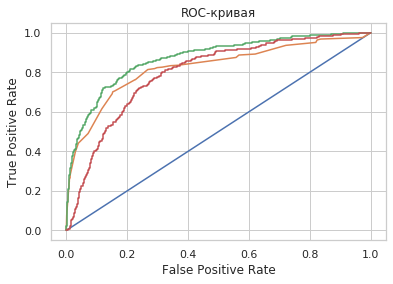

In [45]:
plt.plot(dummy_fpr, dummy_tpr)
plt.plot(DecisionTree_fpr, DecisionTree_tpr)
plt.plot(RandomForest_fpr, RandomForest_tpr)
plt.plot(LogisticRegression_fpr, LogisticRegression_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<font color="ForestGreen"> RandomForest</font><br>
<font color="Coral"> DecisionTree</font><br>
<font color="IndianRed"> LogisticRegression </font><br>
<font color="SteelBlue"> Dummy </font><br>

Лучше всех кривая у RandomForest с параметрами max_depth=11, n_estimators=81

## Тестирование модели

Протестируем модель на найденных параметрах. 
в качестве обучающей возьмем тестовую+валидационную выборку. 

In [40]:
model = RandomForestClassifier(random_state=12345, 
                               max_depth=11, n_estimators=81, class_weight='balanced')
model.fit(features_train.append(features_valid), target_train.append(target_valid)) 

predicted_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
 
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print("F1-мера:", f1_score(target_test, predicted_test))
print("AUC_ROC:", auc_roc)

F1-мера: 0.5913705583756345
AUC_ROC: 0.8555072792360927


Построим ROC-кривую тестирования. <br>

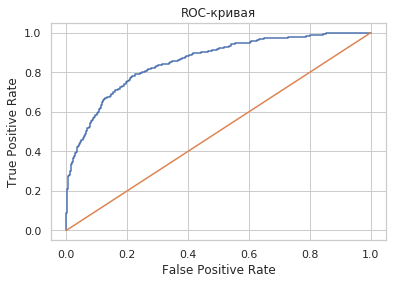

In [41]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.plot(fpr, tpr) 
plt.plot(dummy_fpr, dummy_tpr)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

AUC-ROC случайной модели равна 0.5, наша  AUC-ROC - 0.85, это значит, что наша модель адекватна и хорошо предсказывает. 

## Вывод

Мы исследовали баланс классов, построили, обучили и протестировали три модели: решающее дерево, случайный лес и логистическую регрессию, а так же измерили метрики - F1-меру и AUC-ROC.<br>

Категориальные признаки перевели в численные с помощью One-Hot Encoding, а численные привели к одному масштабу. <br>
Целевой признак в данных распределен в соотношении 80/20, что затрудняет обучение модели. <br>
Для борьбы с дисбалансом мы пробовали использовать балансировку классов с помощью аргумента class_weight и функции увеличения и уменьшения выборки. <br>

В итоге максимально большое значение F-меры показала функция увеличения выборки на модели "Случайный лес"<br>

Удалось добиться результата F-меры более 0.59, а значения AUC-ROC - 0.85. Значения метрик и построенный график ROC-кривой говорят о том, что наша модель адекватна и хорошо предсказывает. <br>